# 2023's Most Streamed Songs on Spotify
## An Exploratory Data Analysis
#### _2ECE-C_ | _RODRIGUEZ, Andrei Joshua A._

✨ Welcome to my deep dive into the world of Top Spotify Songs of 2023! As a huge fan of music and all things streaming, I'm excited to explore what makes these tracks so popular. In this notebook, I'll be analyzing everything from the bpm and energy of the songs to their streaming success and playlist appearances across platforms like Spotify and Apple Music. Whether it's the groovy danceability or the artists making waves this year, we're about to uncover the trends and patterns that make a song go from “just released” to a global hit. Let’s dive into the data and see what makes these tracks tick—and what might just be the next big thing on your playlist!

In [253]:
# These are the libraries we will be using ! 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
# Remember to load the data set before proceeding !
spotify_data = pd.read_excel('spotify-2023.xlsx')
spotify_data   

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Overview of The Dataset
* How many rows and columns does the dataset contain? 
* What are the data types of each column? Are there any missing values? 

In [251]:
# Let's examine the structure of our dataset, as well as it's shape and data types !
shape_info = spotify_data.shape
data_types_info = spotify_data.dtypes

print("Shape of the Dataset: {}".format(shape_info))
print("\nData Types of Each Column:\n{}".format(data_types_info))

Shape of the Dataset: (953, 27)

Data Types of Each Column:
track_name                object
artist(s)_name            object
artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlists       int64
in_spotify_charts          int64
streams                    int64
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists        int64
in_deezer_charts           int64
in_shazam_charts         float64
bpm                        int64
key                       object
mode                      object
danceability_%             int64
valence_%                  int64
energy_%                   int64
acousticness_%             int64
instrumentalness_%         int64
liveness_%                 int64
speechiness_%              int64
release_month              int32
release_year               int32
streams_binned          category
dtype: object


In [257]:
# Get the number of null values in each column
null_counts = spotify_data.isnull().sum()

# Then select the columns with missing values and convert the results into a DataFrame
null_data_df = null_counts[null_counts > 0].reset_index()
null_data_df.columns = ["Column", "Null Count"]


In [259]:
# Now only show the missing data
print("\nColumns with Missing Values:\n")
null_data_df


Columns with Missing Values:



,Column,Null Count
0,in_shazam_charts,50
1,key,95


In [261]:
# Cleaning and Analyzing Stream Data

# Convert any non-numeric values in the 'streams' column to NaN so they won't cause errors
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Function to clean and convert a column to numbers we can use
def clean_and_convert(column_name):
    spotify_data[column_name] = (
        spotify_data[column_name]
        .replace({',': ''}, regex=True)  # Take out any commas in the values
        .astype(float)                   # Convert the values to decimal numbers
        .fillna(0)                       # Replace any NaN values with 0
        .astype(int)                     # Convert the values to whole numbers
    )

# Clean up and convert the 'streams' column (or any column we choose)
clean_and_convert('streams')

# Basic Descriptive Statistics
* What are the mean, median, and standard deviation of the streams column?
* What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [263]:

# Get the mean, median, and standard deviation for the 'streams' column
streams_stats = {
    'Mean': spotify_data['streams'].mean(),
    'Median': spotify_data['streams'].median(),
    'Standard Deviation': spotify_data['streams'].std()
}

# Make a DataFrame to show the statistics for 'streams'
streams_statistics_df = pd.DataFrame({
    'Statistic': list(streams_stats.keys()),
    'Stream Values': list(streams_stats.values())
})

# Set display option to show big numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Print the statistics DataFrame in a readable format
print("\nStream Statistics (Formatted):\n")
streams_statistics_df


Stream Statistics (Formatted):



,Statistic,Stream Values
0,Mean,513597931.31
1,Median,290228626.00
2,Standard Deviation,566803887.06


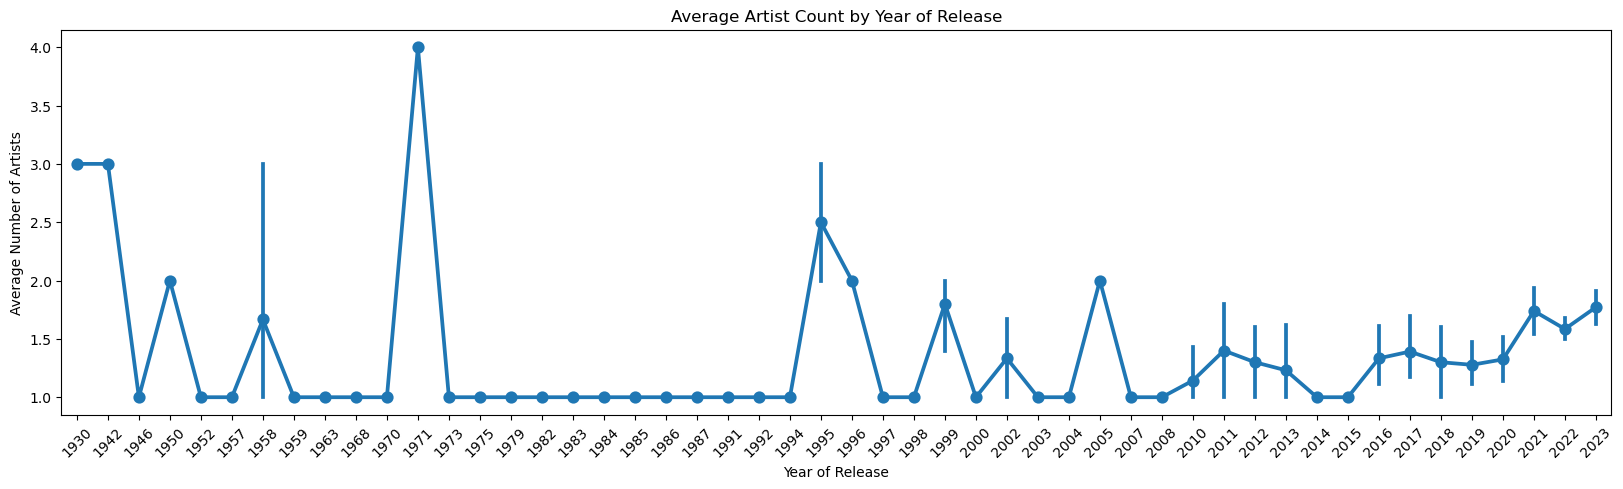

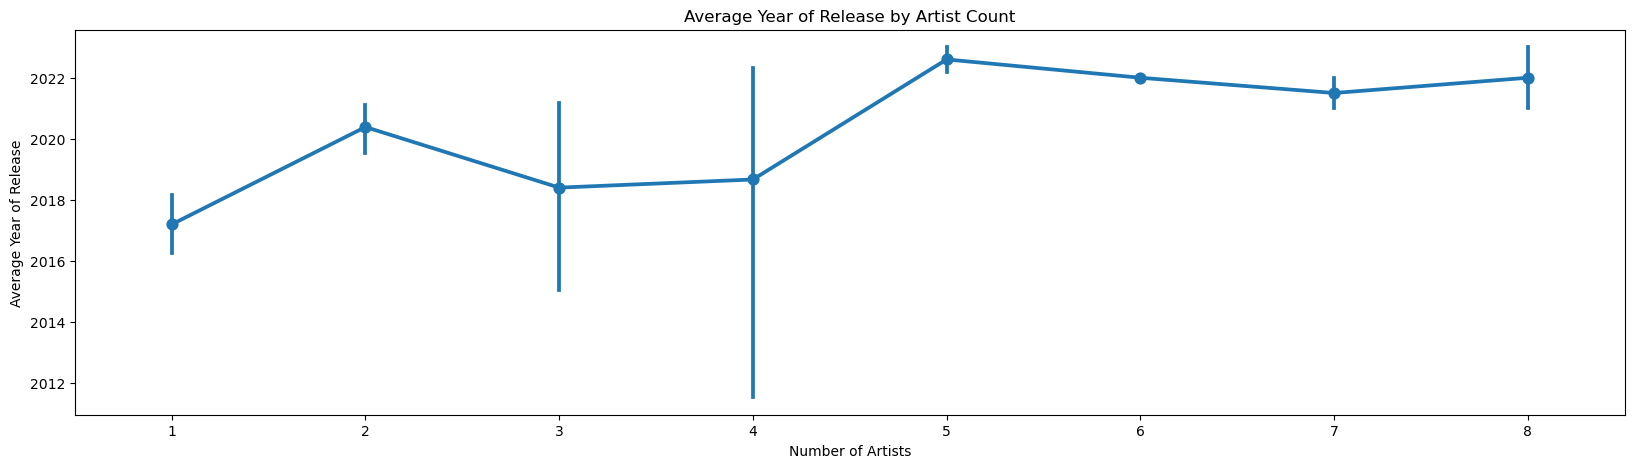

In [267]:
# Visualizing the distribution of 'released_year' and 'artist_count' 
# Using point plots to observe trends 

# Plotting the distribution for 'released_year'
plt.figure(figsize=(20, 5))  # Set the size of the plot (width, height)
sns.pointplot(x='released_year', y='artist_count', data=spotify_data, estimator='mean')  # Plot the data
plt.title('Average Artist Count by Year of Release')  # Title for the plot
plt.xlabel('Year of Release')  # x-axis label
plt.ylabel('Average Number of Artists')  # y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()  # Display the plot

# Plotting the distribution for 'artist_count'
plt.figure(figsize=(20, 5))  # Set the size of the plot (width, height)
sns.pointplot(x='artist_count', y='released_year', data=spotify_data, estimator='mean')  # Plot the data
plt.title('Average Year of Release by Artist Count')  # Title for the plot
plt.xlabel('Number of Artists')  # x-axis label
plt.ylabel('Average Year of Release')  # y-axis label
plt.show()  # Display the plot

#### What is the distribution of released_year and artist_count? 

The distribution of artist counts over the years shows significant variation, with occasional spikes in specific years. Between the 1930s and 1970s, artist counts fluctuated, with notable peaks in years like 1942, 1957, and 1970. The period from the mid-1970s through the 1990s saw a predominance of solo artists, reflected in consistently low artist counts. This period marked the era of solo performances or small-group efforts. However, from the 2000s onwards, there has been a clear upward trend in artist counts, peaking in recent years. This reflects the growing trend of artist collaborations, which have become increasingly popular in modern music, likely due to the desire to reach wider audiences and experiment with genre-blending.

#### Are there any noticeable trends or outliers?
The general trend points to a gradual shift from solo tracks to more collaborative efforts, particularly after the 2000s. In earlier decades, artist counts were typically low, but occasional spikes (such as in 1942, 1957, and 1970) reflect the occurrence of unique or rare collaborative projects. Since around 2015, there has been a noticeable rise in the average number of artists per track, indicating that collaborations have become a dominant force in the industry. These collaborations are seen as mutually beneficial, leading to a richer, more diverse music landscape.

The distribution also shows several outliers: unusually high artist counts in specific years, such as the 1950s, early 1970s, and mid-1990s, suggest instances where large-scale collaborations or special projects occurred. This pattern reinforces the idea that while solo tracks were the norm in earlier decades, the modern music industry is increasingly collaborative, with a steady rise in artist involvement over time.


# Top Performers
* Which track has the highest number of streams? Display the top 5 most streamed tracks.
* Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [269]:
# Find the top 5 tracks based on highest 'streams' values
fantastic_5_tracks_df = spotify_data.loc[:, ['artist(s)_name', 'track_name', 'streams']]  
# Select relevant columns
fantastic_5_tracks_df = fantastic_5_tracks_df.sort_values(by='streams', ascending=False).head(5)  # Sort by 'streams' and get top 5

# Rename columns for better readability
fantastic_5_tracks_df = fantastic_5_tracks_df.rename(columns={'artist(s)_name': 'Artist', 'track_name': 'Track', 'streams': 'Stream Count'})

# Show the top tracks
fantastic_5_tracks_df

,Artist,Track,Stream Count
55,The Weeknd,Blinding Lights,3703895074
179,Ed Sheeran,Shape of You,3562543890
86,Lewis Capaldi,Someone You Loved,2887241814
620,Tones and I,Dance Monkey,2864791672
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550


In [271]:
# Calculate the number of occurrences for each artist
artist_counts = spotify_data['artist(s)_name'].value_counts()  # Count tracks for each artist

# Create a DataFrame with 'Artist' and 'Count' columns, and display the top 5
the_top_five_df = artist_counts.head(5).reset_index()  # Get top 5 artists and reset index for proper DataFrame format
the_top_five_df.columns = ['Artist', 'Count']  # Rename columns for clarity

# Display the DataFrame
the_top_five_df


,Artist,Count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


# Temporal Trends
* Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
* Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

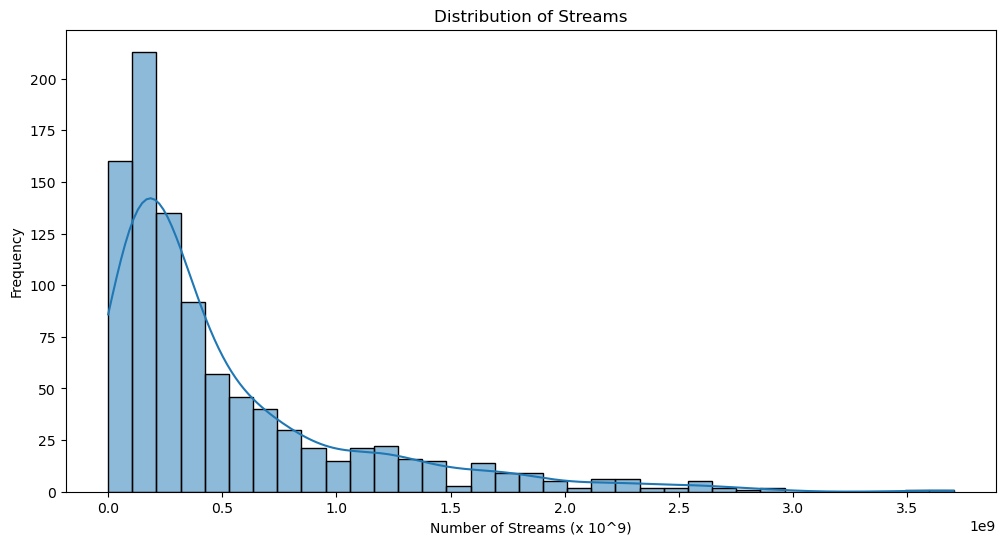

In [273]:
# Distribution plot for the number of 'streams'
# Using a histogram with a KDE (Kernel Density Estimation)

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the histogram with a KDE overlay
sns.histplot(spotify_data['streams'], kde=True)

# Add title and labels
plt.title("Distribution of Streams")  # Plot title
plt.xlabel("Number of Streams (x 10^9)")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label

# Display the plot
plt.show()


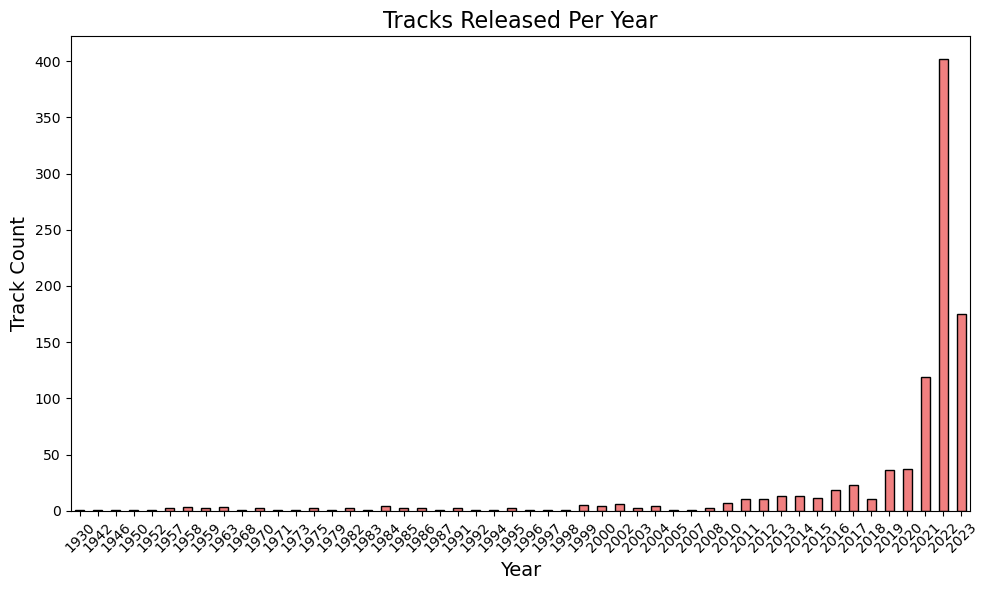

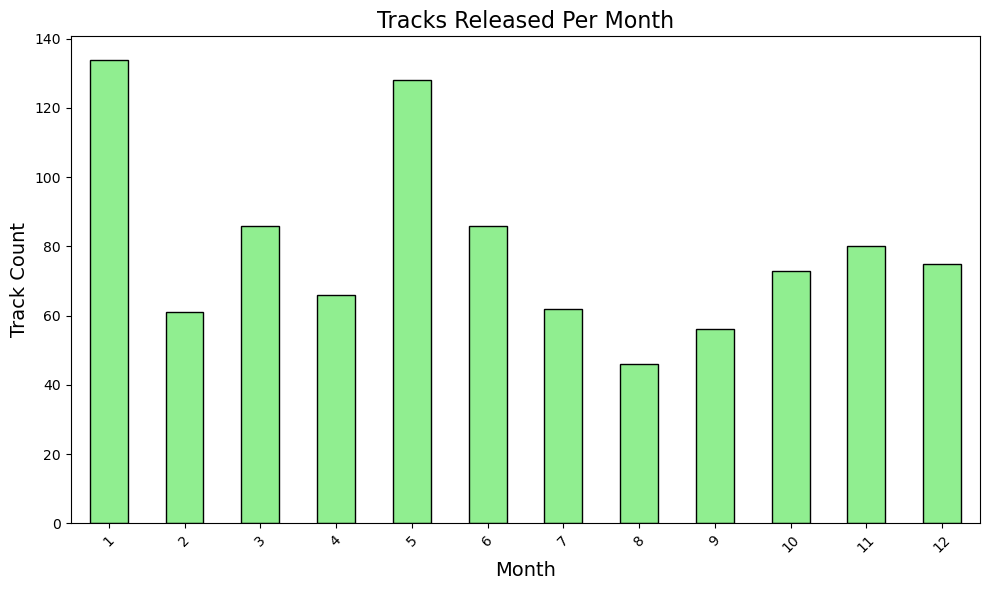

In [275]:
# Define a function to plot data with a specified plot type
def plot_data_custom(data, title='', xlabel='', ylabel='', figsize=(10, 6), color='skyblue', edgecolor='black'):
    """
    This function plots a vertical bar chart based on the input data.

    Parameters:
    - data: The data to plot
    - title: Title of the plot
    - xlabel: Label for the X-axis
    - ylabel: Label for the Y-axis
    - figsize: Size of the plot (default is (10, 6))
    - color: Color of the bars (default is 'skyblue')
    - edgecolor: Color of the bars' edges (default is 'black')
    """
    # Create a new figure with the specified size
    fig, ax = plt.subplots(figsize=figsize)

    # Plot data as a vertical bar plot using value counts, sorted by index
    data.value_counts().sort_index().plot(kind='bar', ax=ax, color=color, edgecolor=edgecolor)

    # Set title and labels for the plot
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    # Rotate x-axis labels if necessary for better readability
    ax.tick_params(axis='x', rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot the number of tracks released per year
plot_data_custom(spotify_data['released_year'], 
                 title="Tracks Released Per Year", 
                 xlabel="Year",  
                 ylabel="Track Count", 
                 color='lightcoral')

# Plot the number of tracks released per month
plot_data_custom(spotify_data['released_month'], 
                 title="Tracks Released Per Month", 
                 xlabel="Month", 
                 ylabel="Track Count", 
                 color='lightgreen')

#### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

In recent years, there has been a noticeable surge in the number of track releases, particularly in 2023, 2022, and 2021, which could be attributed to advancements in digital technologies and improved access to data. In contrast, the period before 2010, especially from the 1930s to the 1990s, shows relatively fewer releases, likely due to incomplete data or lower production volumes during these decades. Additionally, the months of January, May, and December consistently show the highest number of track releases, a pattern that suggests a concentration of music releases at the beginning and end of the year. On the other hand, July and August tend to have fewer releases, which may reflect a seasonal dip in audience engagement during the summer months.



# Genre and Music Characteristics
* Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
* Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

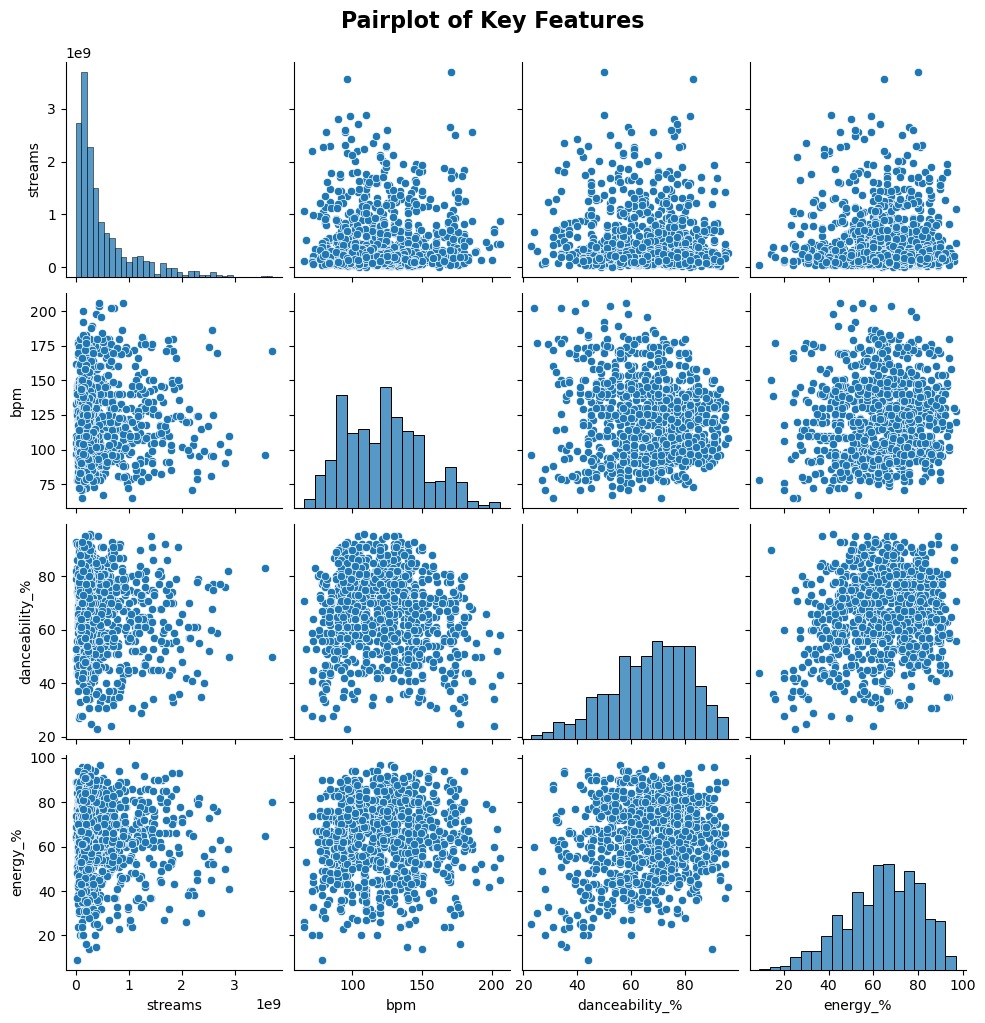

In [277]:
# Create a pairplot to visualize the relationships between features
sns.pairplot(spotify_data[['streams', 'bpm', 'danceability_%', 'energy_%']])
plt.suptitle("Pairplot of Key Features", fontsize=16, fontweight='bold', y=1.02)
plt.show()


### Key Features
- Danceability shows a positive correlation with both energy and streams, whereas tempo is negatively correlated with danceability, indicating that faster songs are generally less danceable.

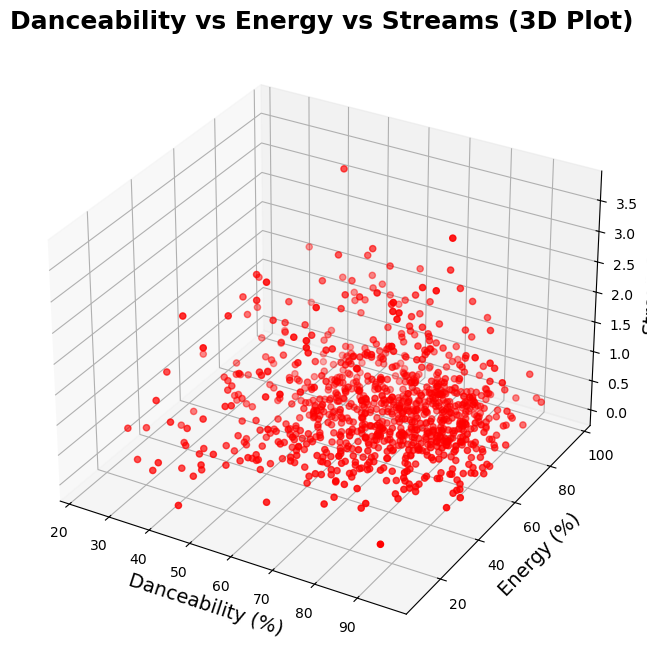

In [215]:
# danceability vs. energy data
# 3D scatter plot with an additional dimension
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points in 3D space
ax.scatter(spotify_data['danceability_%'], spotify_data['energy_%'], spotify_data['streams'], c='r', marker='o')

# Set plot labels
ax.set_title("Danceability vs Energy vs Streams (3D Plot)", fontsize=18, fontweight='bold')
ax.set_xlabel("Danceability (%)", fontsize=14)
ax.set_ylabel("Energy (%)", fontsize=14)
ax.set_zlabel("Streams", fontsize=14)

# Show the plot
plt.show()


### Danceability vs Energy
- The scatter plot reveals a moderate positive correlation between danceability and energy. Songs with higher energy are often more danceable, though other factors may also affect danceability.


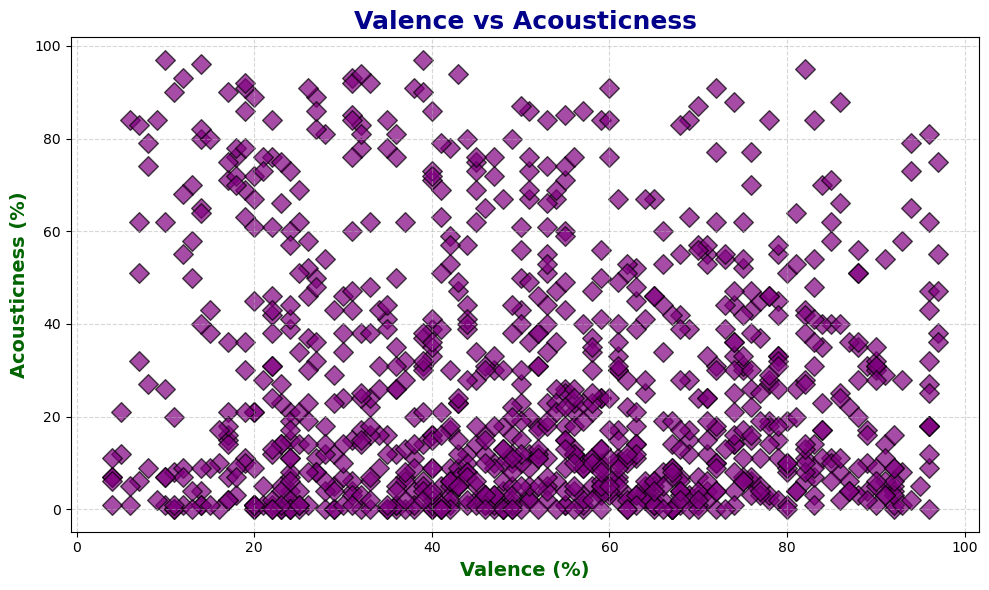

In [221]:
# Valence vs. Acousticness data visualization
# Using matplotlib with a customized scatter plot style

# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot with customized marker style, transparency, and color
plt.scatter(spotify_data['valence_%'], spotify_data['acousticness_%'], 
            color='purple', edgecolors='black', alpha=0.7, s=100, marker='D')  # Customizing markers

# Add a grid to the plot for better visibility
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and labels to the plot
plt.title("Valence vs Acousticness", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Valence (%)", fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Acousticness (%)", fontsize=14, fontweight='bold', color='darkgreen')

# Display the plot
plt.tight_layout()  # Automatically adjust subplot parameters to give some padding
plt.show()


### Valence vs Acousticness
- The scatter plot demonstrates a weak positive correlation between acousticness and valence. While songs with greater acousticness tend to have slightly higher valence, the connection is weak, suggesting that other elements are more influential in determining a song's valence.

# Platform Popularity
* How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare?
* Which platform seems to favor the most popular tracks?


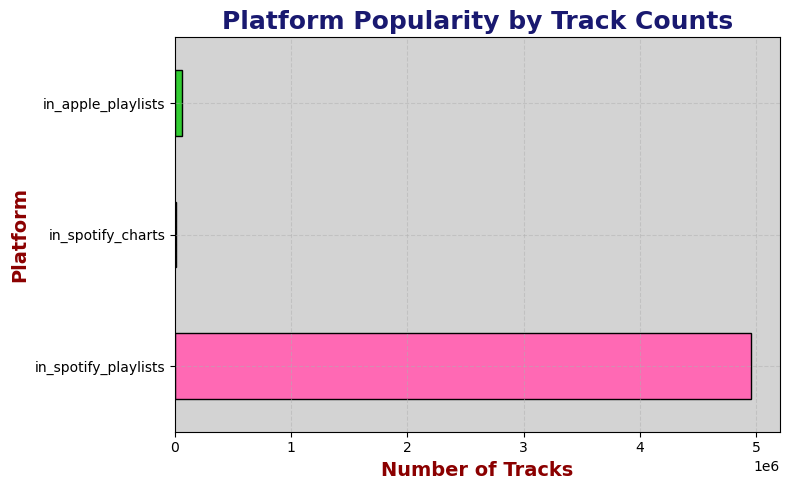

In [279]:
# Summing up track counts for different platforms
platform_popularity = spotify_data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()

# Create a bar plot with horizontal bars
plt.figure(figsize=(8, 5))  # Adjusted figure size for horizontal bars

# Plot the platform popularity with horizontal bars and custom colors
platform_popularity.plot(kind='barh', color=['#FF69B4', '#1E90FF', '#32CD32'], edgecolor='black')

# Add title and labels to the plot
plt.title("Platform Popularity by Track Counts", fontsize=18, fontweight='bold', color='midnightblue')
plt.xlabel("Number of Tracks", fontsize=14, fontweight='bold', color='darkred')
plt.ylabel("Platform", fontsize=14, fontweight='bold', color='darkred')

# Customize gridlines and background for a more unique look
plt.gca().set_facecolor('lightgray')  # Set the background color to light gray
plt.grid(True, linestyle='--', alpha=0.5)  # Add dashed gridlines for better readability

# Display the plot with automatic layout adjustments
plt.tight_layout()
plt.show()


#### Comparison of Tracks Across Platforms

Spotify has a notably higher number of tracks in playlists compared to Apple or Deezer, indicating that it is a dominant platform for curated music collections. This may be due to Spotify’s emphasis on playlist curation, which helps drive user engagement and discoverability, making it the go-to platform for users seeking personalized music experiences. In contrast, Apple and Deezer may have a smaller focus on playlists, concentrating more on individual track streaming or other forms of music discovery.

#### Platform Preference for Popular Tracks
Apple and Shazam show a higher track count than Spotify and Deezer, suggesting they are more inclined to feature popular and trending songs in their charts. This could reflect Apple’s focus on top hits and mainstream artists, while Shazam, known for identifying trending songs, naturally promotes tracks that are currently gaining momentum. Conversely, Spotify and Deezer might focus on more diverse or niche selections, offering listeners a broader range of music beyond just the hits.


# Advanced Analysis
* Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
* Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.



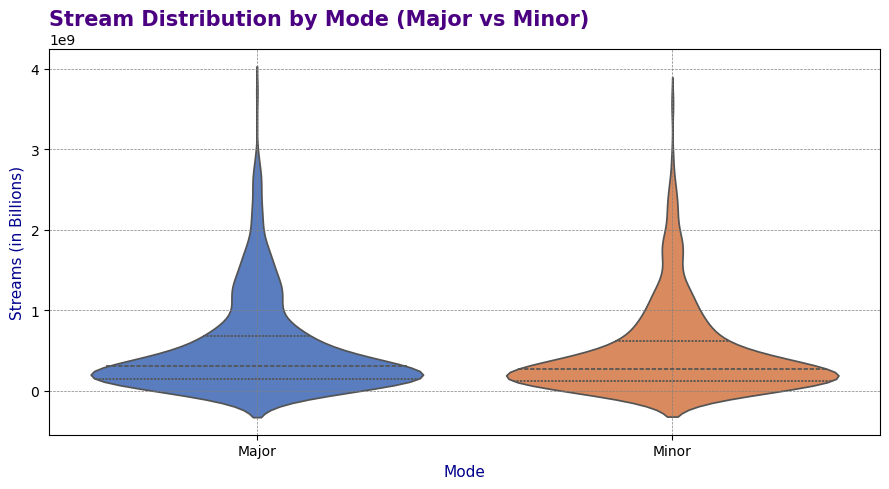

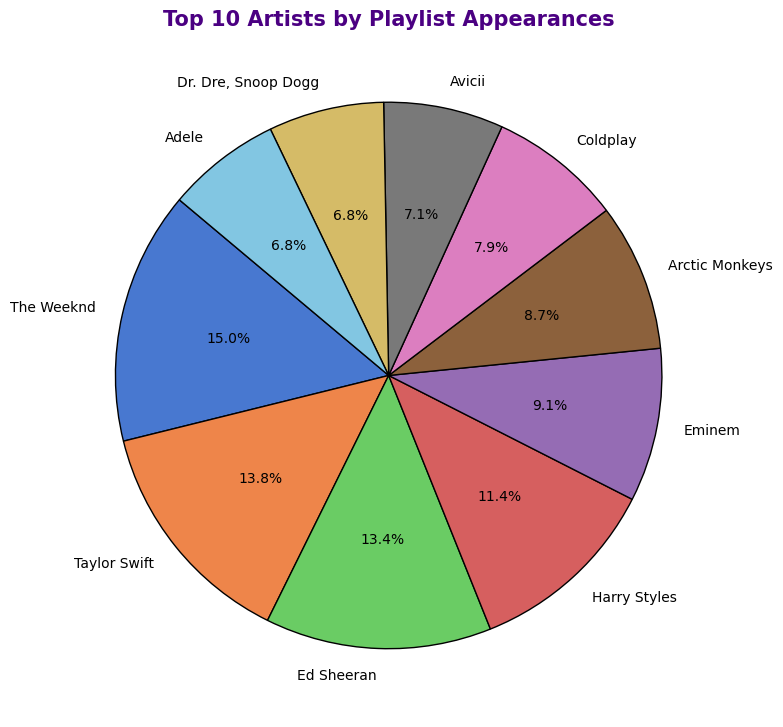

In [289]:

# 1. Stream Distribution by Mode (Major vs Minor) using Violin Plot
fig, ax = plt.subplots(figsize=(9, 5))
sns.violinplot(x='mode', y='streams', data=spotify_data, inner='quartile', ax=ax, hue='mode', palette='muted') 

# Setting title and axis labels
ax.set_title('Stream Distribution by Mode (Major vs Minor)', fontsize=15, fontweight='semibold', color='indigo', loc='left')
ax.set_xlabel('Mode', fontsize=11, color='darkblue')
ax.set_ylabel('Streams (in Billions)', fontsize=11, color='darkblue')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.tight_layout()
plt.show()

# 2. Top 10 Artists by Playlist Appearances as Pie Chart
top_artists = spotify_data.groupby('artist(s)_name')['in_spotify_playlists'].sum().nlargest(10)

fig, ax = plt.subplots(figsize=(8, 8))
colors = sns.color_palette("muted")

# Pie chart with percentage display and shadow effect for clarity
ax.pie(top_artists.values, labels=top_artists.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Adding a title to the pie chart
ax.set_title('Top 10 Artists by Playlist Appearances', fontsize=15, fontweight='semibold', color='indigo')

plt.tight_layout()
plt.show()


#### Patterns Among Tracks with the Same Key or Mode
The distribution of streams shows minimal variation between tracks in Major and Minor modes, indicating that a track’s key does not strongly influence its streaming popularity. This suggests that listeners prioritize other qualities, such as genre, lyrics, or artist popularity, over whether a song is in a Major or Minor key. Therefore, key or mode may be less impactful on streaming trends, as musical mood or emotional tone may play a more significant role in listener engagement.

#### Most Frequently Appearing Artists in Playlists or Charts
Mainstream, highly versatile artists such as The Weeknd, Taylor Swift, and Ed Sheeran appear frequently in playlists and charts, indicating a preference for well-known figures who appeal across genres. Their versatility enables these artists to attract diverse listener groups, which helps maintain high visibility in curated playlists and music charts. This preference for popular, genre-blending artists suggests that platforms aim to feature musicians with broad appeal to maximize engagement and cater to a wide-ranging audience.


### That is all, beautiful hoomans <3